In [22]:
import pandas as pd
from datasets import load_dataset

import string
from nltk.stem.snowball import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re


In [23]:
# Load the Yahoo! Answers Topic Classification dataset
dataset = load_dataset("yahoo_answers_topics")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'topic', 'question_title', 'question_content', 'best_answer'],
        num_rows: 1400000
    })
    test: Dataset({
        features: ['id', 'topic', 'question_title', 'question_content', 'best_answer'],
        num_rows: 60000
    })
})


In [24]:
train = dataset['train'].to_pandas()
train = train.drop(columns='id')

In [25]:
topic_mapping = {
    0: "Society & Culture",
    1: "Science & Mathematics",
    2: "Health",
    3: "Education & Reference",
    4: "Computers & Internet",
    5: "Sports",
    6: "Business & Finance",
    7: "Entertainment & Music",
    8: "Family & Relationships",
    9: "Politics & Government"
}

train['topic_name'] = train['topic'].map(topic_mapping)

In [26]:
punctuation = set(string.punctuation)
# get rid of special characters
alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789 '
stopwordsSet = set(stopwords.words("english"))

In [27]:
def clean_text(content):
    content = content.lower()
    content = ''.join([c for c in content if c not in punctuation and c in alphabet])
    content = ' '.join(w for w in content.split() if w not in stopwordsSet)
    return content

In [28]:
train.question_title = train.question_title.apply(lambda x: clean_text(x))

train.question_content = train.question_content.apply(lambda x: clean_text(x))
train.best_answer = train.best_answer.apply(lambda x: clean_text(x))

In [29]:
train

,topic,question_title,question_content,best_answer,topic_name
0,4,doesnt optical mouse work glass table,even surfaces,optical mice use led camera rapidly capture im...,Computers & Internet
1,5,best offroad motorcycle trail,longdistance trail throughout ca,hear mojave road amazingbr nsearch online,Sports
2,2,trans fat reduce,heard tras fat bad body find daily food,trans fats occur manufactured foods process pa...,Health
3,6,many planes fedex,heard largest airline world,according wwwfedexcom web sitenair fleetbr n b...,Business & Finance
4,6,san francisco bay area make sense rent buy,prices rent price buying make sense mostly ren...,renting vs buying depends goals br ngenerally ...,Business & Finance
...,...,...,...,...,...
1399995,2,ads tv yoko etc regarding height increase use,,increased height 2 feet afterwards yesnnof cou...,Health
1399996,6,ways sell video games,like want sell video games sell,ebay electronic boutique babbages flea markets,Business & Finance
1399997,2,normal nots breast boobs,,normal long cancerous breasts examined every 6...,Health
1399998,0,speak hindi,write,main hindi bol sakti hoonkahiye,Society & Culture


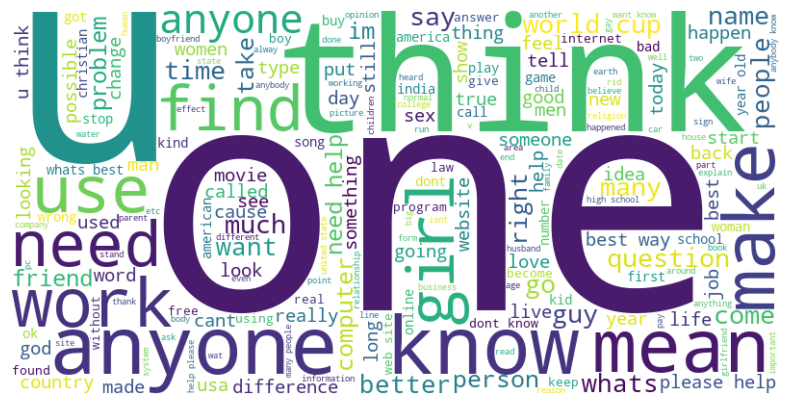

In [30]:
question_titles = " ".join(s for s in train.question_title)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

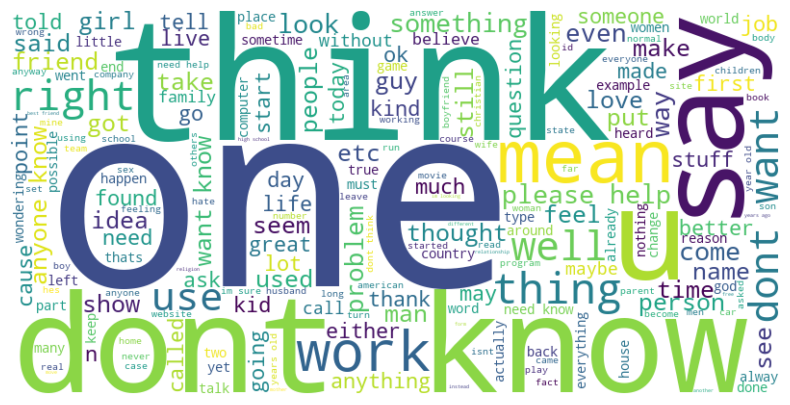

In [31]:
question_contents = " ".join(s for s in train.question_content)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_contents)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

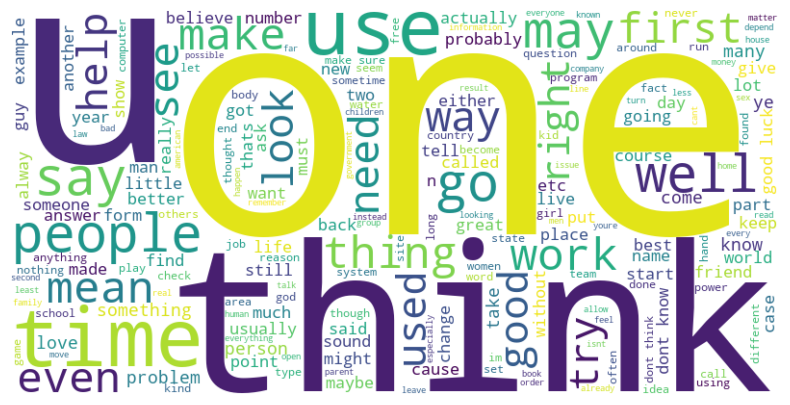

In [32]:
# Sample 20% of the answers
sample_answers = " ".join(s for s in train.best_answer.sample(frac=0.2, random_state=42))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sample_answers)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
# check NaN
train_copy = train.copy()
train_copy.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
nan_counts = train_copy.isna().sum()
nan_counts

topic                    0
question_title        4183
question_content    635515
best_answer          31120
topic_name               0
dtype: int64

In [34]:
# check number of records for each topic
topic_counts = train_copy['topic'].value_counts()
topic_counts

topic
4    140000
5    140000
2    140000
6    140000
1    140000
7    140000
3    140000
8    140000
9    140000
0    140000
Name: count, dtype: int64

### Check special characters and punctuations


In [44]:
# Example of website rows
# pd.set_option('display.max_colwidth', None)
selected_rows = train.iloc[6:8]
selected_rows

,topic,question_title,question_content,best_answer,topic_name
6,1,people blush embarrassed,people blush embarrassed,ask yahoonhttpaskyahoocomask20040113htmlnblushing unique blend evolutionary social behavior involuntary reaction sympathetic nervous system responsible fight flight response blushing solely triggered social cues br npeople generally blush theyre feeling embarrassed scared stressed result fight flight response capillaries carry blood skin widen increased blood flow lends face well sometimes chest neck even body legs reddened color nexcessive facial blushing erythrophobia caused overactivity sympathetic nervous system condition cause lot psychological duress engendered several support groups nits common knowledge animals dont blush evolutionary cues behind blushing also linked something uniquely human moral consciousness,Science & Mathematics
7,7,lin qingxia aka brigitte lin beautiful woman chinese cinema,according stephen chow httpwwwhkentreviewcom2005featureskfhkfhpremhtml true bestlooking male star make movies together,well everyone different definition beauty like lin qingxia think many girls prettier 40 years old nif lin qingxia beautiful woman chinese cinema handsome man chinese cinema chin han always made movies togethernhowever male movie star asked girlfriend real life girlfriend movie beautiful gave good answer think mother beautiful woman world,Entertainment & Music


In [43]:
# Example of mathmatical formula rows
selected_math_rows = train.iloc[15:16]
selected_math_rows[['best_answer']]

,best_answer
15,imaginary numbers numbers squared equal negative number i2 1 imaginary number youll also often see represented 1 thats square root 1ndont confused poorly chosen name imaginary numbers indeed exist used advanced math physics electromagnetic fields analogy wikipedia uses good one like dont need concept fractions count stones doesnt mean fractions dont exist


### Combine title, content and best_answer into one column


In [45]:
combination_all_train = train
combination_all_train['materials'] = combination_all_train['question_title'] + ' ' + combination_all_train['question_content'] + ' ' + combination_all_train['best_answer']
combination_all_train = combination_all_train.drop(columns=['question_title', 'question_content', 'best_answer'])
combination_all_train.head()

,topic,topic_name,materials
0,4,Computers & Internet,doesnt optical mouse work glass table even surfaces optical mice use led camera rapidly capture images surface beneath mouse infomation camera analyzed dsp digital signal processor used detect imperfections underlying surface determine motion materials glass mirrors shiny uniform surfaces interfere ability dsp accurately analyze surface beneath mouse nsince glass transparent uniform mouse unable pick enough imperfections underlying surface determine motion mirrored surfaces also problem since constantly reflect back image causing dsp recognize motion properly system unable see surface changes associated movement mouse work properly
1,5,Sports,best offroad motorcycle trail longdistance trail throughout ca hear mojave road amazingbr nsearch online
2,2,Health,trans fat reduce heard tras fat bad body find daily food trans fats occur manufactured foods process partial hydrogenation hydrogen gas bubbled vegetable oil increase shelf life stabilize original polyunsatured oil resulting fat similar saturated fat raises bad ldl cholesterol lead clogged arteries heart disease nuntil recently food labels required list trans fats health risk remained hidden consumers early july fda regulations changed food labels soon begin identifying trans fat content processed foods
3,6,Business & Finance,many planes fedex heard largest airline world according wwwfedexcom web sitenair fleetbr n br n670 aircraft including br n47 airbus a300600s 17 boeing dc1030s br n62 airbus a310200300s 36 boeing md1010s br n2 atr 72s 5 boeing md1030s br n29 atr 42s 57 boeing md11s br n18 boeing 727100s 10 cessna 208as br n94 boeing 727200s 246 cessna 208bs br n30 boeing dc1010s 17 fokker f27s
4,6,Business & Finance,san francisco bay area make sense rent buy prices rent price buying make sense mostly rent cover mortgage better rent house buy renting vs buying depends goals br ngenerally thinking buying better bc payments would go rent start building equity home govt also incentivizes buy making property tax payments mortgage interest payments tax deductiblenhaving said current housing status bay area housing cost purchase relatively high rental prices compared ownership cost relatively low relative rest country makes lese sense buy vs placesnbottom line base decision whether think market keep going numbers tend even main gain loss buying comes appreciationdepreciation


In [47]:
# check Null values for the new df
combination_all_train_copy = combination_all_train
combination_all_train_copy.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
com_all_nan_counts = combination_all_train_copy.isna().sum()
com_all_nan_counts

topic          0
topic_name     0
materials     38
dtype: int64

In [48]:
combination_all_train_copy[combination_all_train_copy['materials'].isna()]

,topic,topic_name,materials
79414,6,Business & Finance,<NA>
91441,8,Family & Relationships,<NA>
183052,8,Family & Relationships,<NA>
199434,6,Business & Finance,<NA>
212339,6,Business & Finance,<NA>
283208,6,Business & Finance,<NA>
295100,7,Entertainment & Music,<NA>
300375,6,Business & Finance,<NA>
318346,6,Business & Finance,<NA>
376264,0,Society & Culture,<NA>


In [49]:
combination_all_train_no_na = combination_all_train.dropna()

In [52]:
# number of rows left after drop na
len(combination_all_train_no_na)

1399962